# Modelo de Regresión Lineal Simple

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model,datasets

boston = datasets.load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [8]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
print(boston.data.shape)
print(boston.feature_names)
#imprimimos el valor de la quinta columna
X = boston.data[:,np.newaxis, 5] #numero de habitaciones por departamento
print(X.shape)
Y = boston.target

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 1)


Text(0, 0.5, 'Valor medio')

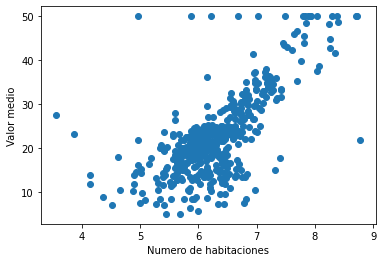

In [10]:
plt.scatter(X,Y)
plt.xlabel('Numero de habitaciones')
plt.ylabel('Valor medio') #Precio

In [11]:
##Implementacion regresion lineal simple##

from sklearn.model_selection import train_test_split #Libreria para deparar datos de prueba
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3) #separamos los datos 70, 30

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

#Definimos el algoritmo a utilizar
model = linear_model.LinearRegression()
#Entrenamos el modelo con los datos de entrenamiento (train)
model.fit(X_train,Y_train)
#una vez entrenado, predecimos los calores de Y con base en R (Es decir, el precio con base en el numero de habitaciones)
Y_pred = model.predict(X_test)

(354, 1) (354,)
(152, 1) (152,)


In [12]:
#Programa para contar los aciertos de nuestro modelo
buenas=0
malas=0
for i in range(152):
  if Y_pred[i] == Y_test[i]:
    buenas+=1
  else:
    malas+=1
print("Aciertos: {} Errores: {}".format(buenas,malas))

Aciertos: 0 Errores: 152


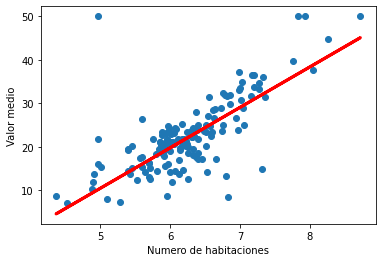

In [13]:
plt.scatter(X_test,Y_test)
plt.xlabel('Numero de habitaciones')
plt.ylabel('Valor medio') #Precio
plt.plot(X_test,Y_pred,color='r',linewidth=3)

In [24]:
##Interactivo: Coloca el numero de habitaciones para el que deseas calcular un valor medio
y_prueba = model.predict([[5]])
print(y_prueba)

[10.44973388]


In [15]:
print("Precision del modelo:")
print(model.score(X_train,Y_train))

Precision del modelo:
0.47094311475863515


####Nuestro sistema no esta tan mal :D
